# Train Test Split 

In [10]:
from sklearn import datasets, neighbors, metrics, svm, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = datasets.load_iris()

# Split it into features and labels
X = iris.data
y = iris.target

print(X.shape, y.shape)

(150, 4) (150,)


### Standard approach to handling data
#### Hours of studying vs. good/bad grades
1. 10 different students
2. Train with 8 students
3. Predict with the remaining 2 students
4. Compare the predictions to the actual result
5. This is how you determine model accuracy

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# K Nearest Neighbors (KNNs)

### How does it work?
- Used for classification
- On a graph, each feature is an axis
- You train the model by plotting an object on the class and associating that point on the graph
- To predict, plot a new point and look at the K nearest points and their classes
- This is how you predict classification

In [13]:
data = pd.read_csv('datasets/car.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [15]:
X = data[[
    'buying',
    'maint',
    'safety'
]].values
y=data[['class']]

print(X, y)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


#### Convert data from categories to actual numbers using LabelEncoder

In [16]:
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])

print(X)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


#### Convert data using Mapping 

In [17]:
label_mapping = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

y['class'] = y['class'].map(label_mapping)
y = np.array(y)
y

C:\Users\arav\AppData\Local\Temp\ipykernel_10744\1504002695.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_mapping)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [2],
       [3]], dtype=int64)

#### Creating and training a KNN

In [20]:
# Create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2)

# Train the model
knn.fit(X_train, y_train)

# Compare results
predictions = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'Predictions: {predictions}')
print(f'Accuracy: {accuracy}')

Predictions: [3 1 0 3 0 0 0 0 1 0 0 0 0 1 1 0 0 0 3 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 3 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 3 0 0 1 1 0 0 1
 0 0 0 2 3 0 0 1 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0
 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 3 0 0 1 1 1 0 0
 1 1 1 3 0 0 0 0 0 0 3 1 0 0 0 0 0 3 1 0 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 3 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 3 1 0 0 0
 0 3 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 1 0 1 2 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 1 1 2 0 0 0 3 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 3 3 3 0 0 0 0 1 1 3 0 0 0 0 3 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 3 0 0 1 0 0 1 0 3 0]
Accuracy: 0.7601156069364162


In [23]:
print('Actual value:', y[20])
print('Predicted value:', knn.predict(X)[20])

Actual value: [0]
Predicted value: 0


# Support Vector Models (SVMs) 

### What are SVMs?
- Imagine a 2D plane with a bunch of data points of different classes
- SVM creates a hyperplane (for a 2D plane, the hyperplane would be a simple line, for a 3D plane, it would be a 2D line)
- This is called a support vector
- It calculates the distance from the data points to the support vector
- Using a different kernel means different forms of vectors (linear, exponential, sigmoid, polynomial, etc.)


### Why SVMs?
1. Good for lots of dimensions
2. Many kernel functions
3. Can be used for classification AND regression

In [4]:
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Viriginica']
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [8]:
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print('Predictions:', predictions)
print('Actual:     ', y_test)
print('Accuracy:', acc)

Predictions: [1 2 1 1 0 2 1 0 1 2 0 0 2 1 2 2 1 1 1 1 0 0 0 2 0 1 1 0 2 1]
Actual:      [1 2 1 1 0 2 1 0 1 2 0 0 2 1 2 2 1 1 1 2 0 0 0 2 0 1 1 0 2 1]
Accuracy: 0.9666666666666667


In [9]:
for i, prediction in enumerate(predictions):
    print(classes[predictions[i]])

Iris Versicolour
Iris Viriginica
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Viriginica
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Viriginica
Iris Setosa
Iris Setosa
Iris Viriginica
Iris Versicolour
Iris Viriginica
Iris Viriginica
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Setosa
Iris Viriginica
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Viriginica
Iris Versicolour


# Linear Regression 

In [12]:
boston = datasets.load_boston()

# features/labels
X = boston.data
y = boston.target

print(X)
print(X.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


In [13]:
print(y)
print(y.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

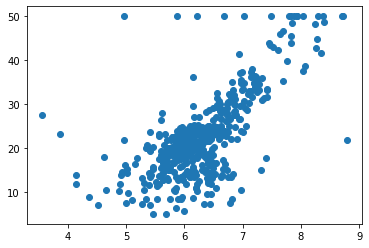

In [20]:
# Algorithm
l_reg = linear_model.LinearRegression()

plt.scatter(X.T[5], y)

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# train
model = l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Predictions:', predictions)
print('R^2 values:', l_reg.score(X, y))

Predictions: [20.61731342 20.46437185  5.62408699 12.37271874 28.49995341 23.12510693
 20.07866532 40.47010212 22.84018353 24.55574876 22.67947312 24.26947359
 19.9099048  25.84793764 16.73250177 13.40398761 40.75245862 -6.34062576
 21.4281036  19.69132202 21.61540349 28.0155051  13.13799037 22.87515072
 28.50673354 25.58773555 13.32807936 11.49599601 27.53914539 21.86213008
 19.88442878 25.54068072 27.38740992 15.72580495 29.24095677 25.82415832
 25.98311032 15.47464698 15.74181045 29.91944882 30.87068238 14.60334047
 21.86082999 37.95698236 24.28118636 43.22737669 14.90611687 13.48451893
 11.50859957 22.55905454 19.59640429 36.72264288  5.79523747 24.22240108
 20.13410429 20.64996782 21.71897172 13.29529482 22.53738979 22.04297812
 10.79304793 13.23600731 19.91041236 30.72742316  7.99827059 26.18882038
 34.64218945 21.32066779 13.56515506 27.57002278 24.88793823 20.26214009
 34.77037991 15.78814552 13.99795599 31.78276922 36.68303483 30.58580159
 35.46215686 18.93679714 25.18414593 3

In [23]:
print('Coeff:', l_reg.coef_)
print('Intercept:', l_reg.intercept_)

Coeff: [-1.28838633e-01  4.79419408e-02  3.62550123e-02  3.18717790e+00
 -1.72117367e+01  3.52780502e+00  1.19597790e-02 -1.39379388e+00
  3.53921280e-01 -1.32778929e-02 -9.62811329e-01  1.07726417e-02
 -6.06209270e-01]
Intercept: 37.262289776913704
